# Simplify SPMe+SEI Model 

The main purpose of this section is to reformulate the SPMe+RF model from. 

Assumptions:

<ol>
    <li> The diffusivity parameter of lithium ion in the negative particle is constant.</li>
    <li> The concentration of lithium ions in the electrolyte is constant.</li>
    <li> The conductivity and transport efficiency of the electrolyte are also constant </li>
    </ol>

$$  
\begin{equation}
\frac{d \bar{\hat{c}}_{\mathrm{n0}}}{d\hat{t}}=\frac{-3}{\alpha_n }\hat{J}_\mathrm{n}^\mathrm{total}.
\end{equation}
$$

$$
 \frac{\partial \varepsilon_\mathrm{n}}{\partial t}= \frac{M_\mathrm{SR}}{n_\mathrm{SR} \rho_\mathrm{SR} F} \bar{J}_\mathrm{SR},
 $$
$$
  L_\mathrm{f, n}=L_\mathrm{f,n,init}-\frac{1}{a_\mathrm{n}}(\varepsilon_\mathrm{n}-\varepsilon_\mathrm{n, init}) 
 $$
 
$$
    J_\mathrm{n}^{\mathrm{total}}=\frac{i_\mathrm{app}}{L_\mathrm{n}}-\bar{J}_\mathrm{SR}, 
$$

$$
    \bar{J}_\mathrm{SR}=\frac{1}{L_\mathrm{n}} \int_0^{L_\mathrm{n}} J_\mathrm{SR} d\scriptstyle{\mathcal{X}},
$$

$$
    J_{\mathrm{SR}}=-a_\mathrm{n} j_\mathrm{SR} \mathrm{exp}\left(-\alpha_\mathrm{SR}\frac{F}{RT} \left(\phi_\mathrm{n}-\phi_\mathrm{e}-U_\mathrm{SR}-\frac{i_\mathrm{app}L_\mathrm{f, n}}{a_\mathrm{n} \sigma_\mathrm{f, n} L_\mathrm{n}} \right ) \right ).
$$

\begin{equation}
\begin{aligned}
&\phi_\mathrm{n}=U_\mathrm{n}(\bar{c}_\mathrm{n}|_{r=R_{n}}) \\
  &\phi_e=- \frac{i_\mathrm{app} }{2 \sigma_\mathrm{e} {\scriptstyle\mathcal{B}} L_n}\scriptstyle\mathcal{X}^2
  \end{aligned}
\end{equation}

So, Basically we are trying two solve DAEs with (1,2 3, 6, 7) for the variables $\bar{c}$, $\varepsilon$, $L_\mathrm{f, n}$,  $\phi_e$ and $\phi_n$ with approperiate initial conditions. For Simiplicity (now) we only conider first terms for $\phi_e$ and $\phi_n$.

In [263]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
# import scipy.sparse as sparse
# pybamm.__version__

<bound method ParameterValues.items of {'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x7f05abe5fd00>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x7f05abe5fc70>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electro

In [264]:
model = pybamm.BaseModel()

In [265]:
cn_av = pybamm.Variable("Concentration [mol.m-3]")
phi_n = pybamm.Variable("Negative electrode potential [V]")
phi_e_n = pybamm.Variable("Negative electrolyte potential [V]", domain="negative electrode")
E_n = pybamm.Variable("Negative electrode porosity", domain="negative electrode")
L_SEI = pybamm.Variable("Thickness of SEI [m]", domain="negative electrode")

x_n = pybamm.SpatialVariable("x_n", domain=["negative electrode"], coord_sys="cartesian")

In [266]:
# dimensional parameters
R_n = pybamm.Parameter("Particle radius [m]")
# D = pybamm.Parameter("Diffusion coefficient [m2.s-1]")
T = pybamm.Parameter('Initial temperature [K]')
R = pybamm.Parameter("Molar gas constant [J.mol-1.K-1]")
F = pybamm.Parameter("Faraday constant [C.mol-1]")
cn0 = pybamm.Parameter("Initial concentration [mol.m-3]")
c_e = pybamm.Parameter("Electrolyte concentration [mol.m-3]")
L_n = pybamm.Parameter("Negative electrode thickness [m]")
I_app = pybamm.Parameter("Applied current [A]")
j_SEI_0 =  pybamm.Parameter('Initial SEI reaction exchange current density [A.m-2]')
an = pybamm.Parameter('Particle surface area to volume ratio [m-1]')
U_SEI= pybamm.Parameter('SEI open-circuit potential [V]')
s_SEI = pybamm.Parameter("SEI conductivity [S.m-1]")
L_SEI_0 = pybamm.Parameter("Initial SEI thickness [m]")
alpha_SEI = pybamm.Parameter('alpha_SEI [-]')
sigma_e=pybamm.Parameter('Electrolyte conductivity [S.m-1]')
B =  pybamm.Parameter("transference efficiency [-]")
E_init=pybamm.Parameter('Initial negative electrode porosity')
M_SEI = pybamm.Parameter("Molar weight of SEI material [kg.mol-1]")
rho_SEI = pybamm.Parameter("Density of SEI material [kg.m-3]")
n_SEI = pybamm.Parameter("electrone number [-]")
# J_SR =  pybamm.Parameter('SEI reaction exchange current density [A.m-2]')



In [267]:
from pybamm import tanh
from pybamm import exp

# # both functions will depend on the maximum concentration
# c_max = pybamm.Parameter("Maximum concentration in positive electrode [mol.m-3]")


# def exchange_current_density(c_surf):
#     k = 6 * 10 ** (-7)   # reaction rate [(A/m2)(m3/mol)**1.5]
#     c_e = 1000  # (constant) electrolyte concentration [mol.m-3]
#     return k * c_e** 0.5 * c_surf ** 0.5 * (c_max - c_surf) ** 0.5


def open_circuit_potential(xx):
#     stretch = 1.062
#     sto = stretch * c_surf / c_max

    u_eq = (
         0.2482
        + 1.9793*exp(-39.3631*xx)
        - 0.0909 * tanh(29.8538*(xx-0.1234))
        - 0.04478 * tanh(14.9159*(xx-0.2769))
        - 0.0205 * tanh(30.4444*(xx-0.6103))
    )
    return u_eq



In [268]:
model.variables = {
    "Concentration [mol.m-3]": cn_av,
    "Negative electrode potential [V]": phi_n,
    "Negative electrolyte potential [V]":  phi_e_n,
    "Negative electrode porosity": E_n, 
    "Thickness of SEI [m]": L_SEI,
}

In [269]:
param = pybamm.ParameterValues(
    {"Particle radius [m]": 5.86e-06,
    #  "Diffusion coefficient [m2.s-1]": 3.3*1e-14,
     'Initial temperature [K]': 298,
     "Molar gas constant [J.mol-1.K-1]": 8.314,
     "Faraday constant [C.mol-1]": 96485.33212,
     "Initial concentration [mol.m-3]": 866,
     "Electrolyte concentration [mol.m-3]": 1000,
     "Negative electrode thickness [m]": 8.52e-05,
     "Applied current [A]": -0.1,
     'Initial SEI reaction exchange current density [A.m-2]': 1.5e-07,
     'Particle surface area to volume ratio [m-1]': 3.84e5,
     'SEI open-circuit potential [V]':  0.4,
     "SEI conductivity [S.m-1]": 5e-6, 
     "Negative electrode OCP [V]": open_circuit_potential,
     "Initial SEI thickness [m]": 5e-9,
     "alpha_SEI [-]": 0.5,
      "Electrolyte conductivity [S.m-1]": 0.95,
      "transference efficiency [-]": 0.9,
     'Initial negative electrode porosity': 0.25,
     "Molar weight of SEI material [kg.mol-1]": 0.162,
     "Density of SEI material [kg.m-3]": 1690, 
     "electrone number [-]": 2,
      
    }
)

In [270]:
# c_surf = pybamm.surf(cn_av)  # get the surface concentration
inputs = {"Negative particle surface concentration [mol.m-3]":cn_av}
Un = pybamm.FunctionParameter("Negative electrode OCP [V]", inputs)
model.algebraic = {
  phi_n: phi_n -  Un,
  phi_e_n: phi_e_n - I_app/(2*sigma_e*B*L_n)*x_n*x_n,
  L_SEI: L_SEI - L_SEI_0-1/an*(E_n-E_init),
  }

In [271]:
# c_surf = pybamm.surf(cn)  # get the surface concentration
# inputs = {"Negative particle surface concentration [mol.m-3]": c_surf}
# Un = pybamm.FunctionParameter("Negative electrode OCP [V]", inputs)
# # phi_e_n = I_app/(2*sigma_e*B*L_n)

# phi_n = 0

# phi_e_n = I_app/(2*sigma_e*B*L_n)*x_n*x_n
J_SR =  -an * j_SEI_0 * pybamm.exp(-alpha_SEI*F/(R*T) * (phi_n - phi_e_n - U_SEI- (I_app*L_SEI/(L_n*an*s_SEI))))
J_SR_AV =  pybamm.x_average(J_SR)

In [272]:
dcndt = -3/(an*R_n*F)*(I_app/L_n - J_SR_AV)
dEndt=M_SEI/(n_SEI*rho_SEI*F)*J_SR_AV

In [273]:
model.rhs = {cn_av: dcndt, E_n: dEndt} 

In [274]:
# Initial Condition
# c0_surf = pybamm.surf(cn0) 
inputs = {"Initial concentration [mol.m-3]": cn0}
U_init = pybamm.FunctionParameter("Negative electrode OCP [V]", inputs)
print(U_init.evaluate)
model.initial_conditions = {
    phi_n: 0,
    phi_e_n: -3,
    L_SEI: L_SEI_0,
    cn_av: cn0,
    E_n: E_init,
}

<bound method Symbol.evaluate of FunctionParameter(-0x11735ec9b37e7e46, Negative electrode OCP [V], children=['Initial concentration [mol.m-3]'], domains={})>


In [275]:
model.build_model()

In [276]:
geometry = {
    "negative electrode": {x_n: {"min": 0, "max": L_n}},
}

In [277]:
param.process_model(model)
param.process_geometry(geometry)

In [278]:
submesh_types = {
    "negative electrode": pybamm.Uniform1DSubMesh,
   # "negative particle": pybamm.Uniform1DSubMesh,
}
# var_pts = {x_n: 20, r: 30}
var_pts = {x_n: 10}
mesh = pybamm.Mesh(geometry, submesh_types, var_pts)

spatial_methods = {
    "negative electrode": pybamm.FiniteVolume(),
}
disc = pybamm.Discretisation(mesh, spatial_methods)
disc.process_model(model)

In [279]:
cycle_number =2
exp = pybamm.Experiment(
    [("Charge at C/20 until 4.2 V",
       "Rest for 20 hours",
     "Discharge at C/20 until 2.5 V",
     "Rest for 20 hours")] *cycle_number
#      +[("Charge at 0.3C  until 4.2 V", 
#       "Rest for 2 hours", 
#       "Discharge at 0.7C until 2.5 V", 
#        "Rest for 2 hours")]* cycle_number
)




# s = pybamm.step.string
# exp = pybamm.Experiment(
#     [
#         (s("Charge at C/20 until 4.2 V", period="10 minutes"),
#         s("Rest for 1 hour", period="3 minutes")),
#     ]
# )

In [280]:
# solver = pybamm.CasadiSolver()
solver = pybamm.IDAKLUSolver()
t = np.linspace(0, 12600, 1000)
sim=pybamm.Simulation(model, parameter_values=param, var_pts=var_pts,  solver=solver)
    # sim = pybamm.Simulation(models[index],  var_pts=var_pts, experiment=exp,  solver=solver)

solution =sim.solve(t)


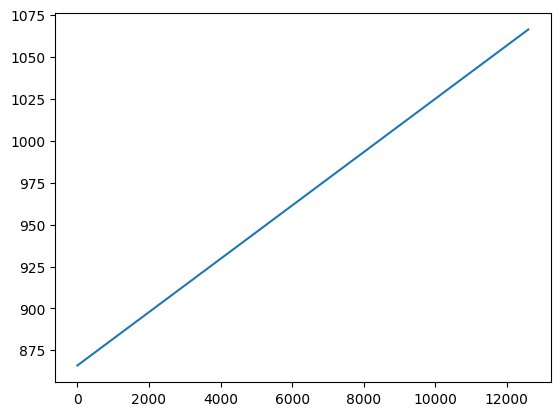

In [281]:
# # cc=solution["cn"]
# # ee=solution["E_n"]
# # plt.plot(t,cc)
tt=solution.t
cc=solution["Concentration [mol.m-3]"].entries
# En=solution["Concentration [mol.m-3]"].entries
# # L_SEI=solution["Thickness of SEI [m]"].entries
# # L_SEI: L_SEI_0-1/an*(En-E_init)  
plt.plot(tt,cc)
# # plt.plot(tt,L_SEI[0,:])

In [282]:
dd=pybamm.electrolyte_conductivity.LeadingOrder(
    model.param
)

AttributeError: 'BaseModel' object has no attribute '_param'